# Preprocessing

In [1]:
import pandas as pd


character_metadata = pd.read_csv('character.metadata.tsv', sep='\t')
movie_metadata = pd.read_csv('movie.metadata.tsv', sep='\t')

In [2]:
# Assigning column names to `character_metadata` DataFrame
character_metadata.columns = [
    "Wikipedia Movie ID",
    "Freebase Movie ID",
    "Movie Release Date",
    "Character Name",
    "Actor DOB",
    "Actor Gender",
    "Actor Height (m)",
    "Actor Ethnicity (Freebase ID)",
    "Actor Name",
    "Actor Age at Movie Release",
    "Freebase Character/Actor Map ID",
    "Freebase Character ID",
    "Freebase Actor ID"
]


movie_metadata.columns = [
    "Wikipedia Movie ID",
    "Freebase Movie ID",
    "Movie Name",
    "Movie Release Date",
    "Movie Box Office Revenue",
    "Movie Runtime",
    "Movie Languages",
    "Movie Countries",
    "Movie Genres"
]


In [4]:
movie_metadata["Movie Release Year"] = movie_metadata["Movie Release Date"].str[:4]
unique_years = movie_metadata["Movie Release Year"].unique()

movie_metadata["Movie Release Date"] = movie_metadata["Movie Release Year"]

movie_metadata.drop(columns=["Movie Release Year"], inplace=True)

In [5]:
unique_release_dates = character_metadata["Movie Release Date"].unique()

In [6]:
character_metadata["Movie Release Year"] = character_metadata["Movie Release Date"].str[:4]
unique_years = character_metadata["Movie Release Year"].unique()

character_metadata["Actor DOB year"] = character_metadata["Actor DOB"].str[:4]
unique_years1 = character_metadata["Actor DOB year"].unique()

character_metadata["Movie Release Date"] = character_metadata["Movie Release Year"]
character_metadata.drop(columns=["Movie Release Year"], inplace=True)

character_metadata["Actor DOB"] = character_metadata["Actor DOB year"]
character_metadata.drop(columns=["Actor DOB year"], inplace=True)

In [7]:
import pandas as pd
import json
import numpy as np

def extract_tuples_values(json_string):
    """
    Given a json string, return the list of values in the dict
    """
    try:

        dictionary = json.loads(json_string)
       
        values_list = list(dictionary.values())
        return values_list
    except (json.JSONDecodeError, TypeError):
        return np.nan  


movie_metadata['Movie Languages'] = movie_metadata['Movie Languages'].apply(extract_tuples_values)


flattened_languages = movie_metadata['Movie Languages'].dropna().explode().unique()


print(flattened_languages)


['English Language' 'Norwegian Language' 'German Language' 'Silent film'
 'Spanish Language' 'Japanese Language' 'Turkish Language' nan
 'Russian Language' 'Italian Language' 'Tamil Language' 'Hindi Language'
 'Malayalam Language' 'Standard Mandarin' 'Afrikaans Language' 'Cantonese'
 'Standard Cantonese' 'Swedish Language' 'Danish Language'
 'Portuguese Language' 'Dutch Language' 'Polish Language'
 'Korean Language' 'Hungary' 'Hungarian language' 'Telugu language'
 'French Language' 'Punjabi language' 'Romani language' 'Serbo-Croatian'
 'Bulgarian Language' 'Serbian language' 'Arabic Language'
 'Greek Language' 'Nepali Language' 'Swahili Language' 'Finnish Language'
 'Tagalog language' 'Romanian Language' 'Bengali Language'
 'Czech Language' 'Slovak Language' 'Chinese language' 'Kannada Language'
 'Irish' 'Hebrew Language' 'Filipino language' 'American English'
 'Indonesian Language' 'Gujarati Language' 'Urdu Language'
 'Macedonian Language' 'Georgian Language' 'Croatian language'
 'Bo

In [8]:
movie_metadata['Movie Countries'] = movie_metadata['Movie Countries'].apply(extract_tuples_values)

In [9]:

movie_metadata['Movie Genres'] = movie_metadata['Movie Genres'].apply(extract_tuples_values)

In [10]:
movie_metadata.head(40)

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Movie Release Date,Movie Box Office Revenue,Movie Runtime,Movie Languages,Movie Countries,Movie Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]
4,13696889,/m/03cfc81,The Gangsters,1913,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
5,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]"
6,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
7,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,[Spanish Language],[Argentina],"[Musical, Drama, Comedy]"
8,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,[English Language],[United Kingdom],"[Horror, Supernatural]"
9,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"


# Movies per Genre

In [12]:
genre_counts = pd.Series([genre for genres in movie_metadata['Movie Genres'] for genre in genres]).value_counts()


print(genre_counts)


Drama                   34007
Comedy                  16349
Romance Film            10234
Black-and-white          9094
Action                   8797
                        ...  
Silhouette animation        1
Buddy Picture               1
Romantic thriller           1
Statutory rape              1
Linguistics                 1
Length: 363, dtype: int64


In [15]:
unique_genres = pd.Series([genre for genres in movie_metadata['Movie Genres'] for genre in genres]).unique()


print("Unique Genres:")
print(unique_genres)

Unique Genres:
['Mystery' 'Biographical film' 'Drama' 'Crime Drama' 'Crime Fiction'
 'Thriller' 'Erotic thriller' 'Psychological thriller' 'Short Film'
 'Silent film' 'Indie' 'Black-and-white' 'Comedy' 'Family Film' 'Fantasy'
 'Adventure' 'World cinema' 'Musical' 'Horror' 'Supernatural'
 'Japanese Movies' 'Action/Adventure' 'Romantic comedy' 'Ensemble Film'
 'Comedy-drama' 'Romantic drama' 'Romance Film' 'Costume drama' 'War film'
 'Epic' 'Period piece' 'Film adaptation' 'Science Fiction' 'Animation'
 'Action' "Children's/Family" "Children's Fantasy" 'Future noir'
 'Comedy film' 'Coming of age' 'Suspense' 'Crime Thriller' 'Black comedy'
 'Bollywood' 'Marriage Drama' 'Wuxia' 'Martial Arts Film' 'Chinese Movies'
 'Western' 'Parody' 'Mockumentary' 'Fan film' 'Cult' 'Adventure Comedy'
 'Slapstick' 'Biopic [feature]' 'Historical Epic' 'Sports' 'Family Drama'
 'Political drama' 'Historical fiction' 'Courtroom Drama'
 'Culture & Society' 'Biography' 'Documentary' 'Christmas movie'
 'Televisio

In [13]:
import matplotlib.pyplot as plt

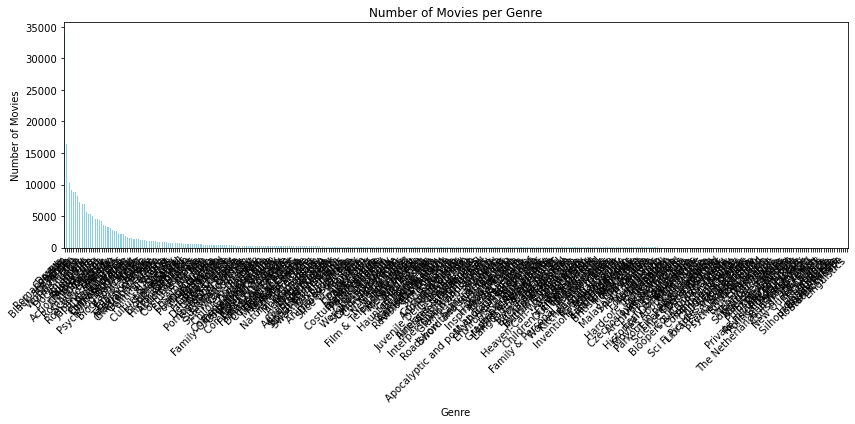

In [14]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()